# About the Project

This project involves a comprehensive analysis of data pertaining to Gross Domestic Product (GDP) and life expectancy, sourced from the World Health Organization and the World Bank. The objective is to derive meaningful insights and examine the potential correlations between these two indicators.

## Data Sources

The GDP data is obtained from the World Bank national accounts data and the OECD National Accounts data files. Life expectancy data is sourced from the World Health Organization. The dataset, contained in `all_data.csv`, comprises the following columns:

- **Country**: The nation being observed
- **Year**: The year of observation
- **Life expectancy at birth (years)**: The average number of years a newborn is expected to live
- **GDP**: The Gross Domestic Product measured in U.S. dollars

## Project Objectives

The project aims to achieve the following:

1. **Exploratory Data Analysis (EDA)**:
   - Conduct an in-depth exploration and cleaning of the dataset
   - Validate the integrity and accuracy of the data

2. **Data Analysis**:
   The analysis seeks to address several key questions:
   - How is GDP distributed across countries? Are there more high-income or low-income nations?
   - What is the distribution of life expectancy at birth? Do most countries have high life expectancy?
   - What are the average GDP and life expectancy values for each country?
   - How have countries historically performed in terms of GDP? Have their GDPs generally increased or decreased?
   - How has life expectancy evolved over time in different countries? Have these values generally risen or fallen?
   - Is there a correlation between GDP and life expectancy?


### Import libraries and load the data

In [273]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

df = pd.read_csv("all_data.csv")

### Inspect the data values by printing the 5 first rows

In [274]:

print(df.head())


  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


### Inspect the data for Inconveniences
- Verify the completeness of the data by checking for any missing values in key columns.
- Inspect the data types of each column to ensure they align with the expected format (e.g., numerical data for GDP, integer or float for life expectancy).
- Look for any anomalies or outliers that may require further investigation or treatment.
- Review the dataset for any signs of data corruption or irregularities.

In [275]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


With the assurance that our dataset lacks missing data, we can now focus on refining the dataset for enhanced analysis efficiency. This involves renaming lengthy column names to more concise alternatives and adjusting data types where necessary.

Renaming Columns:

The column "Life expectancy at birth (years)" will be renamed to "LEBY".
The country name "United States of America" in the "Country" column will be abbreviated to "USA".
To improve readability and interpretation, we will convert the "GDP" column values, currently in scientific notation, into trillions of U.S. dollars (USD trillions).
These modifications will simplify references to these data points, particularly in visual representations.
Adjusting Data Types:

The "Year" column, which currently contains float numerical values, will be converted to an integer data type. This change will eliminate unnecessary decimal points, as years are typically represented in whole numbers.

In [276]:
df.rename(columns={
    "Life expectancy at birth (years)":"LEBY",
    "United States of America":"USA"
}, inplace=True)
df["GDP"]=df["GDP"]/10**12
df["Year"] = df["Year"].astype(int)


### Summary statistics

In [277]:
df_summary = df.describe()
print(df_summary)

              Year       LEBY        GDP
count    96.000000  96.000000  96.000000
mean   2007.500000  72.789583   3.880499
std       4.633971  10.672882   5.197561
min    2000.000000  44.300000   0.004416
25%    2003.750000  74.475000   0.173302
50%    2007.500000  76.750000   1.280220
75%    2011.250000  78.900000   4.067510
max    2015.000000  81.000000  18.100000


1. Year:
   
    - The data spans from 2000 to 2015, as indicated by the minimum and maximum values.
    - The mean and median (50%) years are both the same, suggesting a uniformly distributed dataset over this period.


2. LEBY:
   
    - Life expectancy ranges from a low of 44 years to a high of 81 years.
    - The average life expectancy is approximately 72 years.
    - The standard deviation of 10.67 indicates some variability in life expectancy across different countries or regions. At this point we can not to conclude if the data is normally distributed and the mean is a great     statistic for further analysis.


3. GDP:
   
    - GDP values vary significantly, with a minimum of approximately 0.004 trillion USD and a maximum of 18.1 trillion USD.
    - The 25th, 50th (median), and 75th percentiles show an ascending trend in GDP values, reflecting a wide disparity in economic sizes among the observed nations. As LEBY also increases we can start thinking that this two values can be correlated.
    - The average GDP is around 3.88 trillion USD, but there is considerable variation, as shown by the standard deviation of 5.2 trillion USD. At this point we can not to conclude if the data is normally distributed and the mean is a great statistic for further analysis.

### GDP Distribution
Now we will examine how GPD is distributed

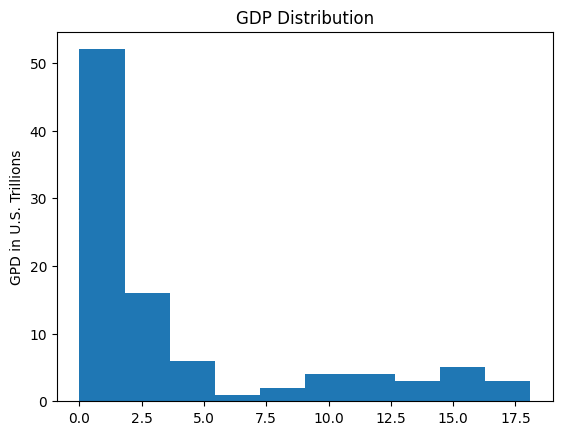

<Figure size 640x480 with 0 Axes>

In [278]:

plt.hist(df.GDP)
plt.ylabel("GPD in U.S. Trillions")
plt.title("GDP Distribution")
plt.show()
plt.clf()


GPD distribution presents a clear ight-skewed distribution, with a majority of countries having lower GDP values and a smaller number of countries with significantly higher GDPs. This distribution reflects a notable disparity in the economic sizes of the observed nations, with wealth being concentrated in a limited number of countries


### Life Expectancy Distribution

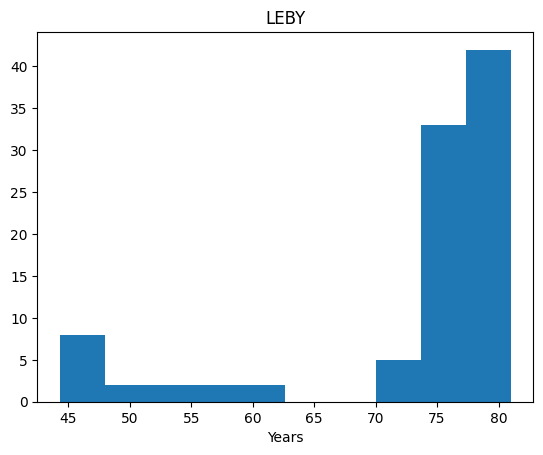

<Figure size 640x480 with 0 Axes>

In [279]:
plt.hist(df.LEBY)
plt.xlabel("Years")
plt.title("LEBY")
plt.show()
plt.clf()

The histogram appears to exhibit a bimodal distribution, with two distinct peaks, suggesting that there are two prevalent groups in terms of life expectancy within the dataset. Where the first peak, at the lower end of the life expectancy scale, indicates that there is a subset of countries where the life expectancy at birth is notably lower than the global average and the second and higher peak, at the right end of the histogram, shows that a larger number of countries have a higher life expectancy, which is closer to the global average or above it. But despite the presence of a group with lower life expectancy, the overall trend in the dataset leans towards higher life expectancy.

We can conclude that both GDP and LEBY distributions do not follow a normal distribution.


## Data related by Country

### Grouping the data by country using the mean

In [280]:
df_grouped = df.drop("Year", axis=1).groupby("Country").median().reset_index()
df_grouped

,Country,LEBY,GDP
0,Chile,79.00,0.172997
1,China,74.45,4.075195
2,Germany,79.85,3.396350
3,Mexico,75.65,1.004375
4,United States of America,78.15,14.450000
5,Zimbabwe,47.40,0.006734


### GPD by Country

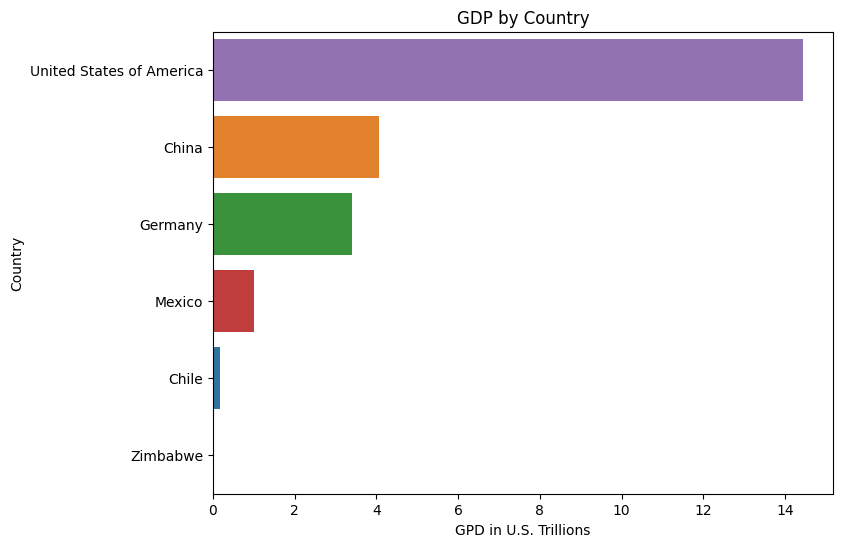

<Figure size 640x480 with 0 Axes>

In [281]:
plt.figure(figsize=(8,6))
sns.barplot(x="GDP", y="Country", hue="Country", errorbar=None, order=df_grouped.sort_values(by="GDP",ascending=False).Country, data=df_grouped)
plt.xlabel("GPD in U.S. Trillions")
plt.title("GDP by Country")
plt.show()
plt.clf()

The bar chart illustrates a stark disparity in GDP among nations, with the United States of America significantly outpacing other countries like China, Germany, and notably, Zimbabwe, which has the lowest GDP by a considerable margin

We can inspect for the presence of outliers by using a box plot

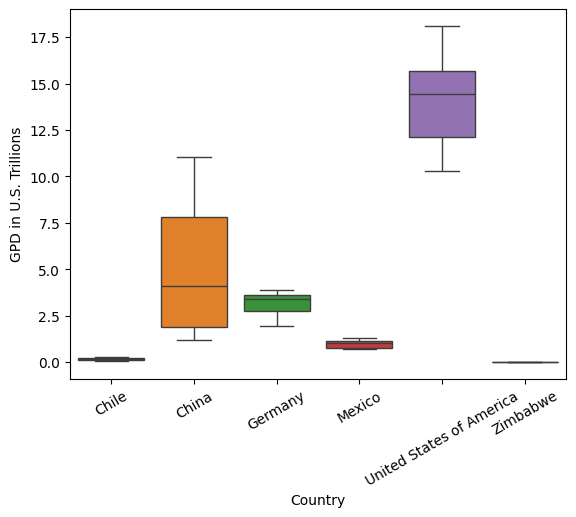

<Figure size 640x480 with 0 Axes>

In [282]:
sns.boxplot(x="Country", y="GDP", hue="Country",data=df)
plt.ylabel("GPD in U.S. Trillions")
plt.xticks(rotation= 30)
plt.show()
plt.clf()

There are no nottable outliyers

### Life Expectancy by Country

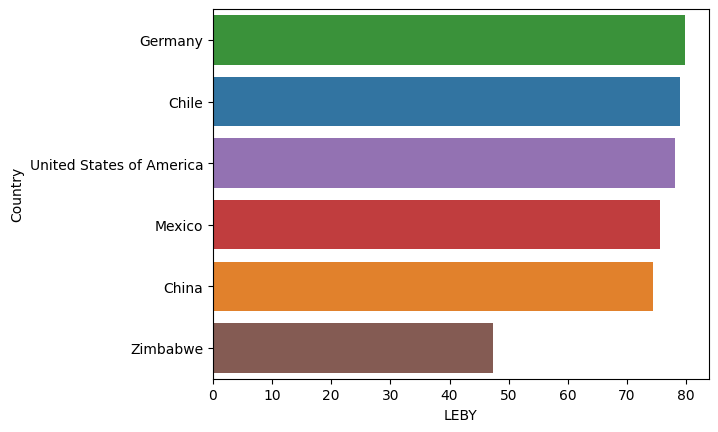

<Figure size 640x480 with 0 Axes>

In [283]:
sns.barplot(x="LEBY", y="Country", hue="Country", errorbar=None, order=df_grouped.sort_values(by="LEBY",ascending=False).Country, data=df_grouped)
plt.show()
plt.clf()

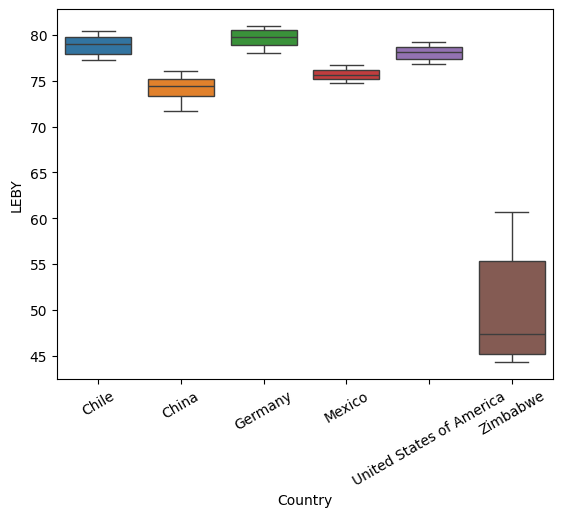

<Figure size 640x480 with 0 Axes>

In [284]:
sns.boxplot(x="Country", y="LEBY", hue="Country",data=df)
plt.xticks(rotation= 30)
plt.show()
plt.clf()

### GDP Performance by Country

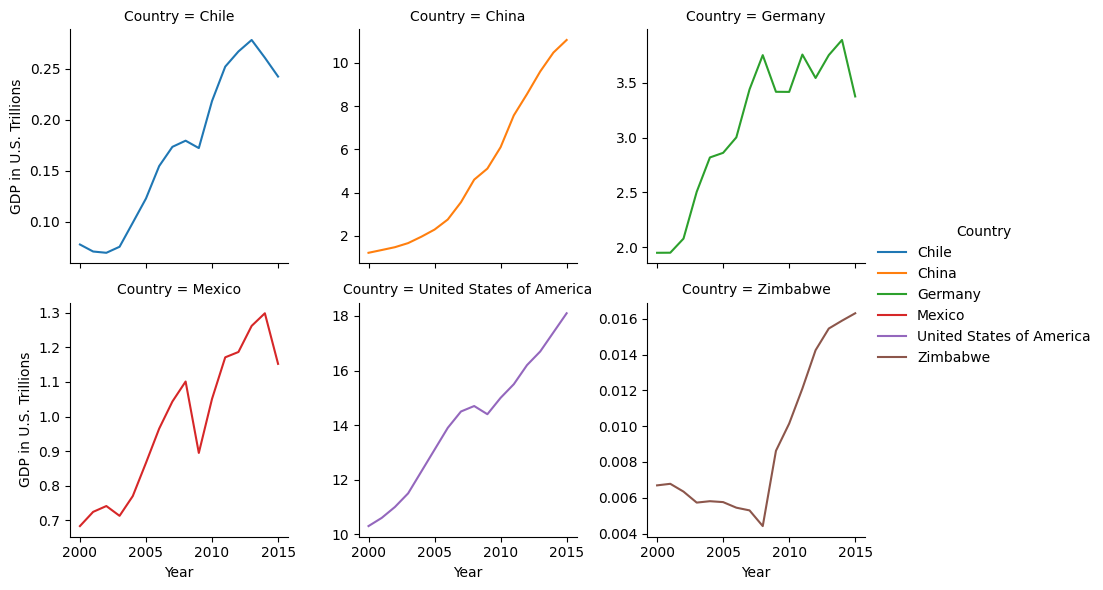

<Figure size 640x480 with 0 Axes>

In [285]:
g= sns.FacetGrid(df, col="Country", col_wrap=3, hue="Country",sharey = False)
g.map(sns.lineplot, "Year", "GDP").add_legend().set_axis_labels("Year", "GDP in U.S. Trillions")
plt.show()
plt.clf()

All six countries have demonstrate significant growth. 

China demonstrates remarkable growth, while the United States maintains a steady, upward trend. Germany experiences fluctuations but an overall positive trend. Chile and Mexico show growth with some volatility. Zimbabwe, although displaying growth, remains significantly lower in GDP compared to the others.

#### Which country has had the highest growth?

In [286]:
for country in df["Country"].unique():
    first_GDP_Value = df[(df["Country"]==country) & (df["Year"]==df["Year"].min())]["GDP"].values[0]
    last_GDP_Value = df[(df["Country"]==country) & (df["Year"]==df["Year"].max())]["GDP"].values[0]
    GDP_change = ((last_GDP_Value - first_GDP_Value) / first_GDP_Value) * 100
    print(f"{country}, {GDP_change:.2f} % ")

Chile, 211.48 % 
China, 813.42 % 
Germany, 73.11 % 
Mexico, 68.55 % 
United States of America, 75.73 % 
Zimbabwe, 143.72 % 


China is the Country with more growth between the years 2000 and 2015

## Life Expectancy Evolution

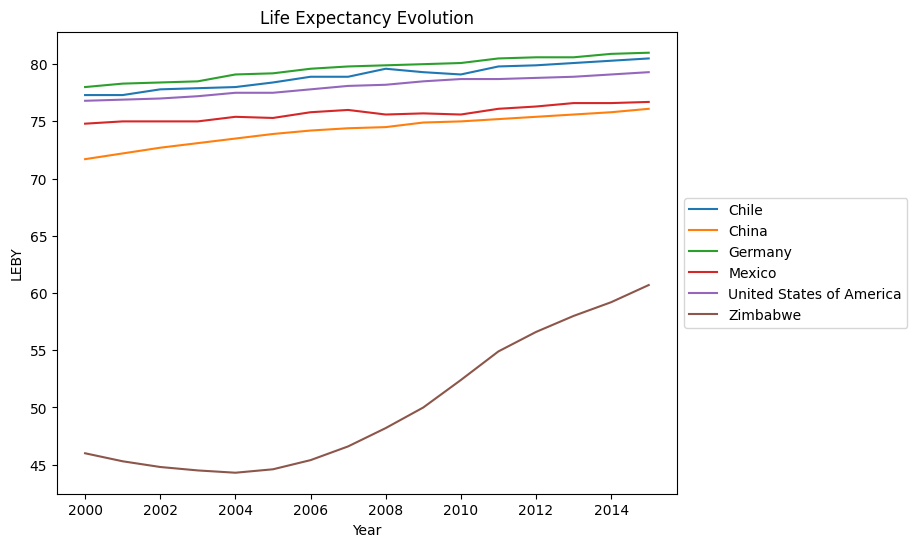

<Figure size 640x480 with 0 Axes>

In [287]:
plt.figure(figsize=(8,6))
sns.lineplot(data=df, x="Year", y="LEBY", hue="Country")
plt.legend(loc="center left", bbox_to_anchor=(1,0.5), ncol=1)
plt.title("Life Expectancy Evolution")
plt.show()
plt.clf()

The line chart indicates that Chile, Germany, and the United States of America have higher and relatively stable life expectancy (LEBY) trends over the years, while Zimbabwe has shown improvement but still lags significantly behind the others

## Relationship between GDP and Life Expectancy

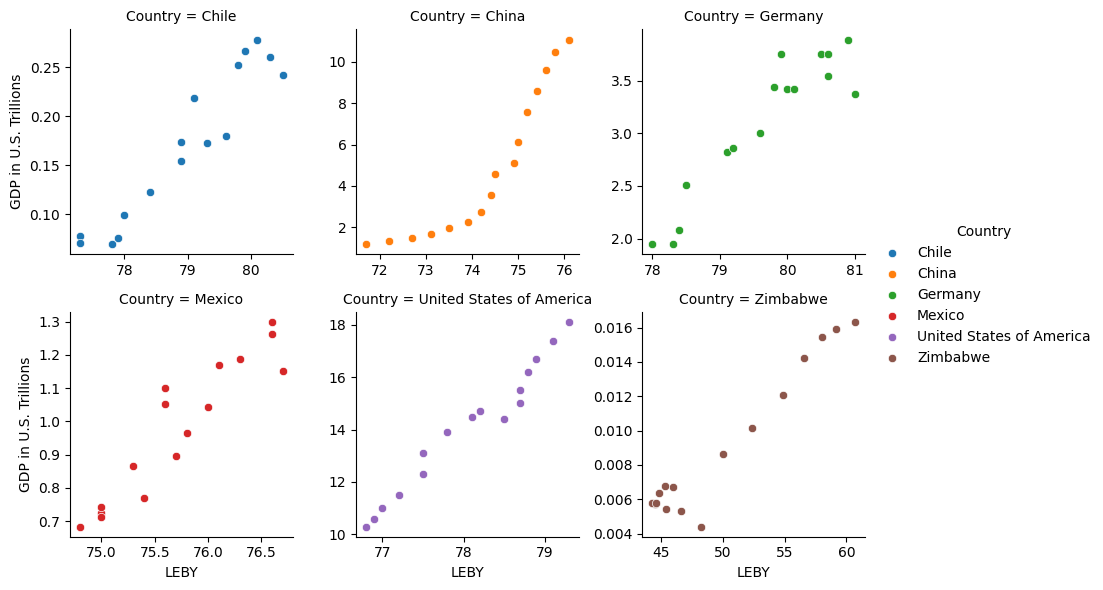

<Figure size 640x480 with 0 Axes>

In [288]:
g= sns.FacetGrid(df, col="Country", col_wrap=3, hue="Country",sharey = False, sharex=False)
g.map(sns.scatterplot, "LEBY", "GDP").add_legend().set_axis_labels("LEBY", "GDP in U.S. Trillions")
plt.show()
plt.clf()

The scatter plots suggest a positive correlation between GDP and life expectancy at birth (LEBY) across different countries, with higher GDP generally associated with higher life expectancy. Notably, the United States demonstrates a strong positive trend, while Zimbabwe shows a more modest relationship at lower GDP and LEBY levels.

# Conclusions
**Economic Inequality:** There is a pronounced economic disparity among countries. While China's economy has shown impressive growth, nations like Zimbabwe have much lower GDPs, indicating significant differences in economic size and available resources.

**Life Expectancy:** Generally, countries with higher GDPs tend to have greater life expectancy, as reflected in the data for nations like Germany, Chile, and the United States. Zimbabwe exhibits considerably lower life expectancy, though with an improving trend over the years.

**Positive Correlation:** Scatter plots reveal a positive correlation between GDP and LEBY, suggesting that as a country's GDP increases, life expectancy at birth tends to rise as well. This implies that a stronger economy can support better health outcomes, possibly due to greater investments in health infrastructure, education, and social services. If we observe the Zimbabwe's case we can se how the negative tendency of the GDP between the years 2000 and 2008 reflects a decrease in Life Expectancy while the rapid increase of GDP between years 2010 and 2015 yields to an increase of the Life Expectancy on the country.

**Variability and Temporal Trends:** Economic and life expectancy trajectories vary over time. While some countries show steady economic growth and improvements in LEBY, others experience volatility or slower growth in both measures.
